In [25]:
# question 9a)

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
data=np.load("/content/olivetti_faces.npy")
target=np.load("/content/olivetti_faces_target.npy")

In [26]:
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


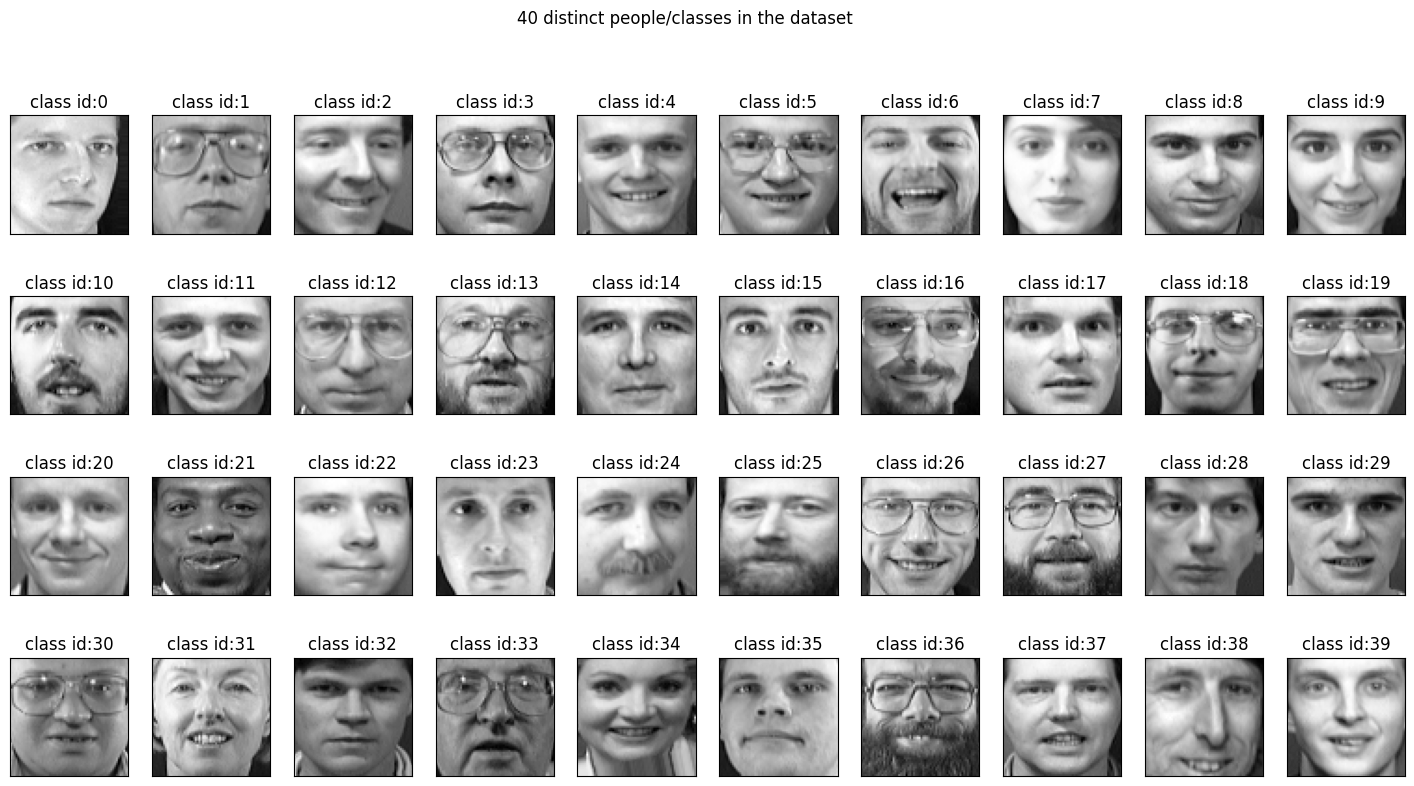

In [27]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

show_a_random_face_per_class(data, np.unique(target))

In [28]:
# now we flatten each 64x64 image as a single vector 64x64=4096 (for training NN)
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

(400, 4096)

In [29]:
# now we slpilt training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, stratify=target, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 4096)
(80, 4096)
(320,)
(80,)


In [30]:
from sklearn.neural_network import MLPClassifier
# solver=lbfgs, sgd, adam
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=100, random_state=42,activation='logistic',max_iter=10000,early_stopping=True,verbose=1)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=100, max_iter=10000, random_state=42,
              solver='lbfgs', verbose=1)

In [31]:
y_pred=clf.predict(X_test)
print(y_test)
print(y_pred)

[18 23 39  6 38 28 19 22  4 24 37  7 34 32  8 31 25 34 27 29 24  5  2 26
 11 26 11 33  5 35 35 13 39  4  2 10 30 36 15 17  9 29  9  1 14  7 14  1
  6  3 15 30  0  3 27 16 20 32 12 28 21 25 19 38 22 16 33 31 17 23 13 10
 37 20  8 12 21 36 18  0]
[18 23 39  6 38 28 19 16  5 24 37  7 34 32  8 31 25 34 27 29 24  5  2 26
 11 26 11 33  5 35 35 13  9  4  2 10 30 16 15 17  9 29  9 26 14  7 14  1
  6 24 15 30 39  3 27 16 20 32  3 28 21 24 19 38 12 16 33 24 17 23 25 10
 37  5  8 22 21 36 18  7]


In [32]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
cf

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [33]:
# use scikit-learn to calculate accuracy.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8125